In [140]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [141]:
import warnings
warnings.filterwarnings('ignore')

In [142]:
## load the data
df = pd.read_csv(r"heart_failure_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


no missing values

but age and platelets have both integers and float??

will that be an issue? possible encoding needed? 
encoding is more for non-numerical data

just convert 

In [144]:
integer_data = df.astype(int) 

In [145]:
df

# converted 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [146]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization
scaler = MinMaxScaler()  # Create a MinMaxScaler object
normalized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Standardization
scaler = StandardScaler()  # Create a StandardScaler object
standardized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
 

normalization and standardization are essential preprocessing steps that help improve the stability, performance, and interpretability of machine learning models, particularly when dealing with datasets with features of different scales and units.

heat map correlation 

<Axes: >

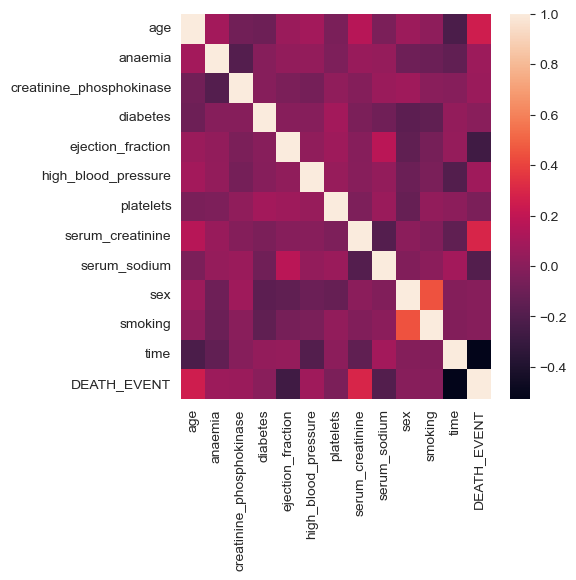

In [147]:
corr_mat = df.corr(numeric_only=True)
corr_mat
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(corr_mat, annot=False)

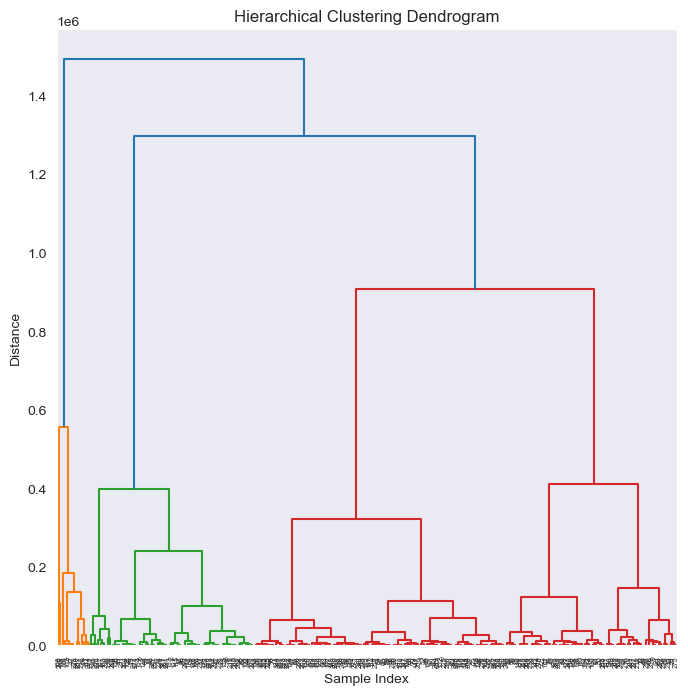

In [211]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df, method='ward')  # You can choose different linkage methods

# Plot the dendrogram
plt.figure(figsize=(8,8))
dendrogram(Z, orientation='top', truncate_mode='level', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

our number of clustrer is 2 

In [149]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage= 'ward')
cluster.fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

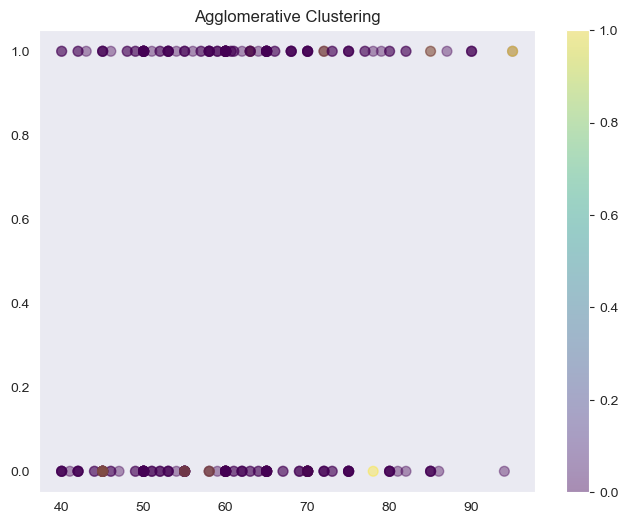

In [228]:

cluster_labels = cluster.fit_predict(df)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.4)
plt.title('Agglomerative Clustering')
plt.colorbar()
plt.show()

In [150]:
cl = cluster.fit_predict(df)

from sklearn.metrics import silhouette_score
silhouette_score(df,cl)

0.6789288512516751

The silhouette score is a metric used to evaluate the quality of clusters created by clustering algorithms like K-means. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

silhouette score ranges from -1 to 1


Close to 1: It suggests that the data points are well-clustered, with good separation between clusters.
Close to 0: It suggests overlapping clusters or that the data points are close to the decision boundary between clusters.
Close to -1: It suggests that the data points may have been assigned to the wrong clusters.


A silhouette score of 0.6789288512516751 is considered relatively high.

In general, a silhouette score above 0.5 indicates that the clustering configuration is appropriate and the clusters are well-separated. Therefore, a score of 0.6789 suggests that the clusters are well-defined and distinct from each other.

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classification model (Random Forest as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[33  2]
 [13 12]]


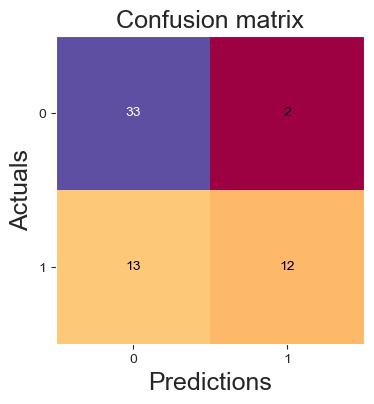

In [178]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(4,4), cmap='Spectral') # cmap = 'Spectral' is cute too
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()


logistic regression, decision trees, random forests to do 

## 0 and 1
#0.5 ----randomely guessing
#less than 0.5 poor model and you need to go back and try several other models
#1--- indicating that your model is able to predict positive and negative classess perfectly

AUC Score: 0.824


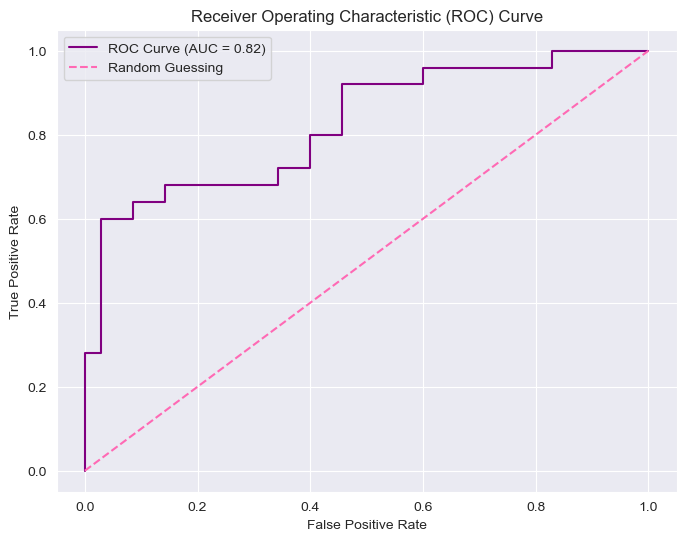

In [252]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'X' contains features and 'y' contains the target variable
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']
# X and y should be prepared from your heart dataset

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='hotpink', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


scatter graphs ?? kmeans clusterinf ?

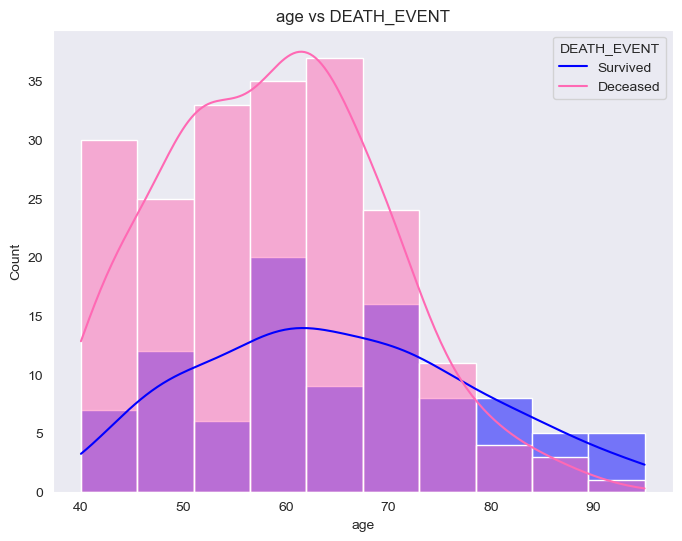

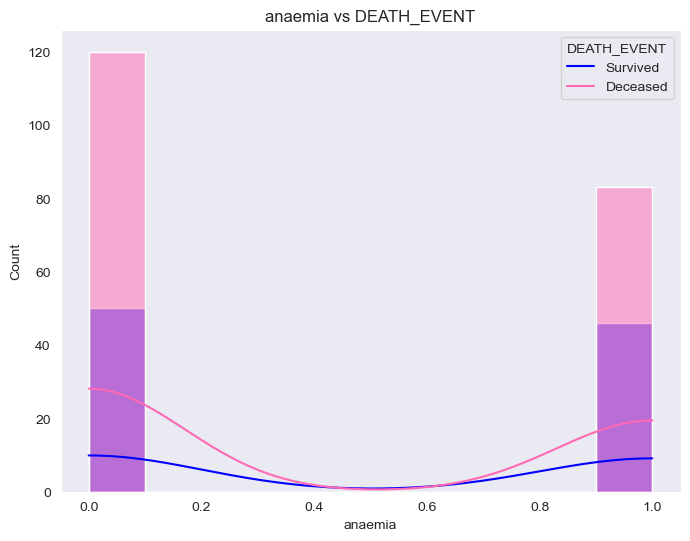

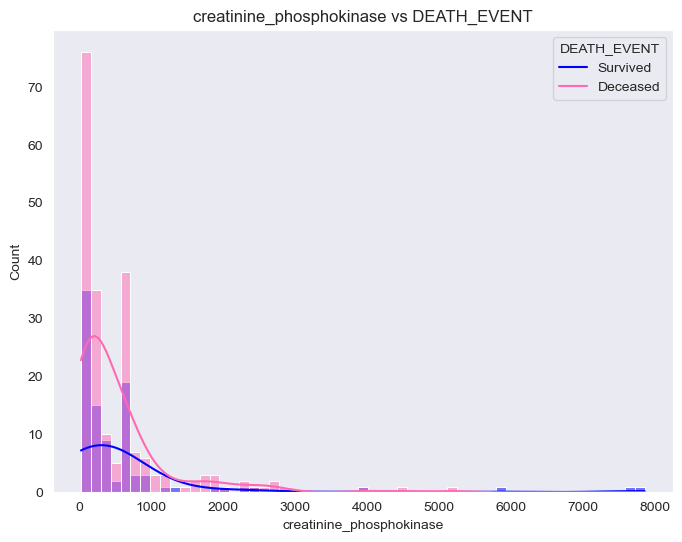

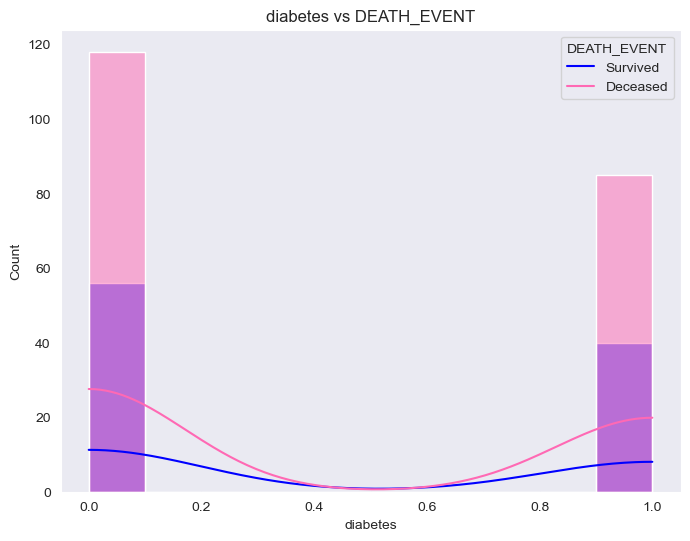

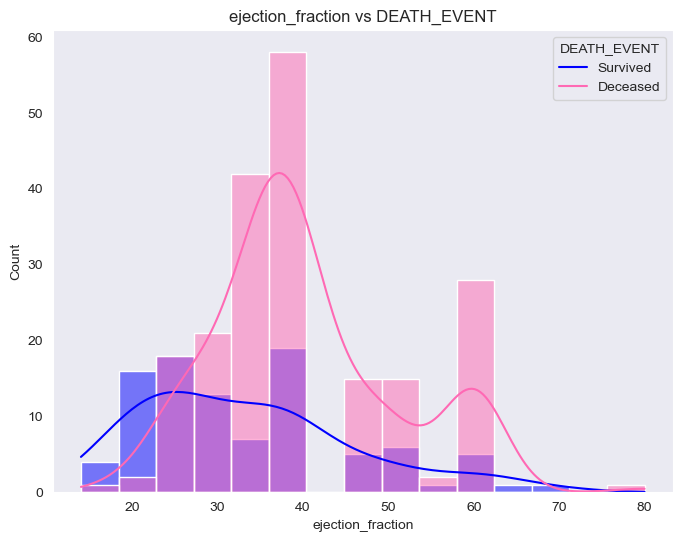

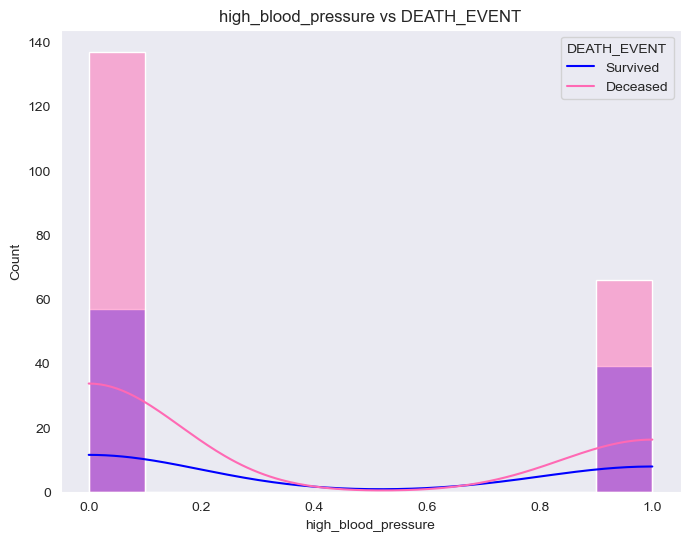

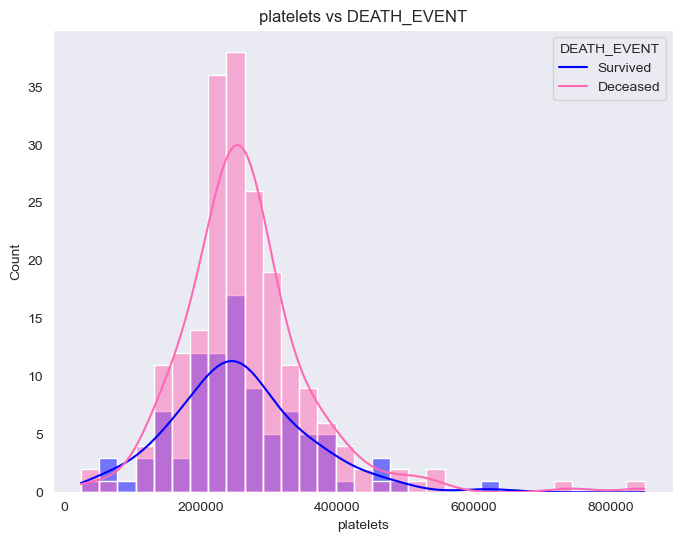

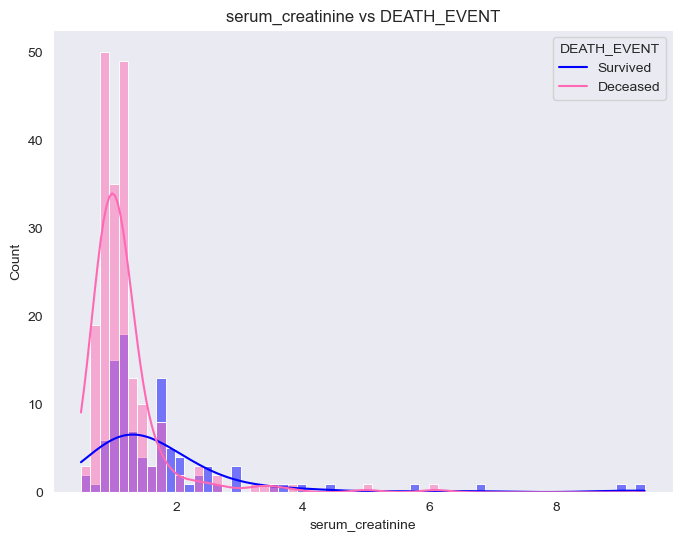

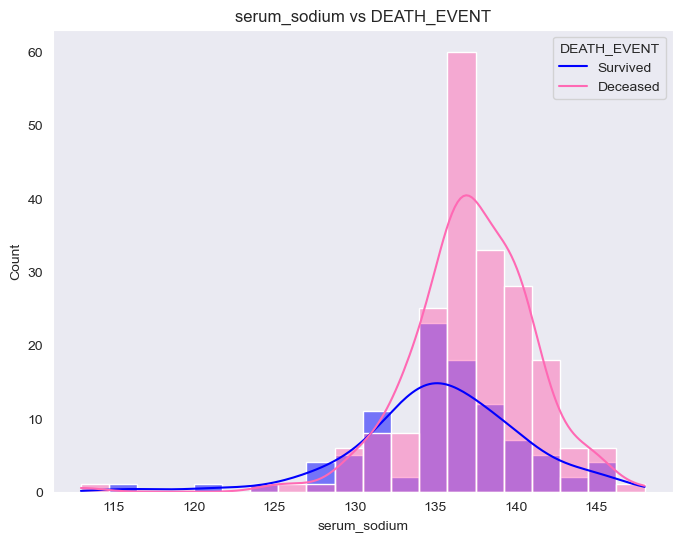

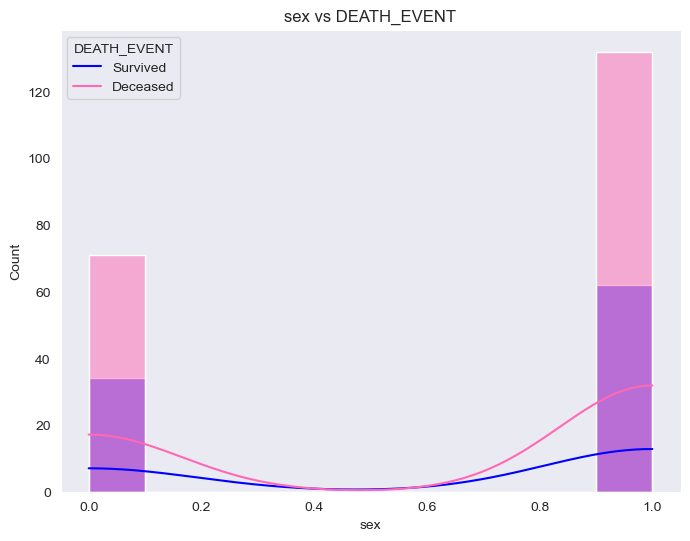

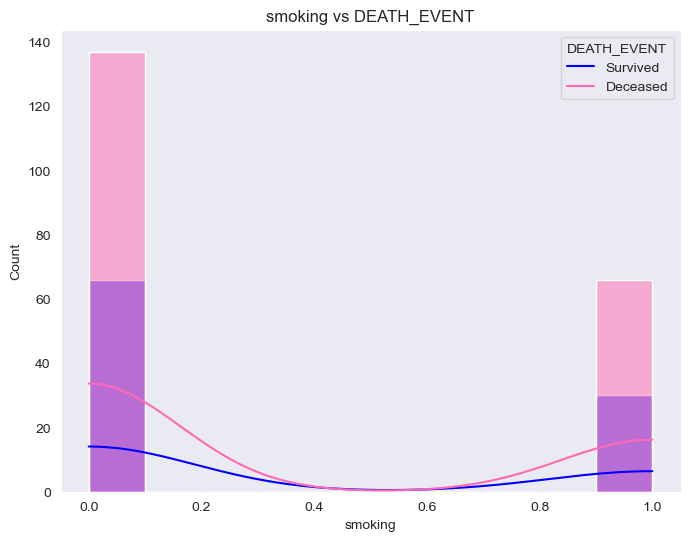

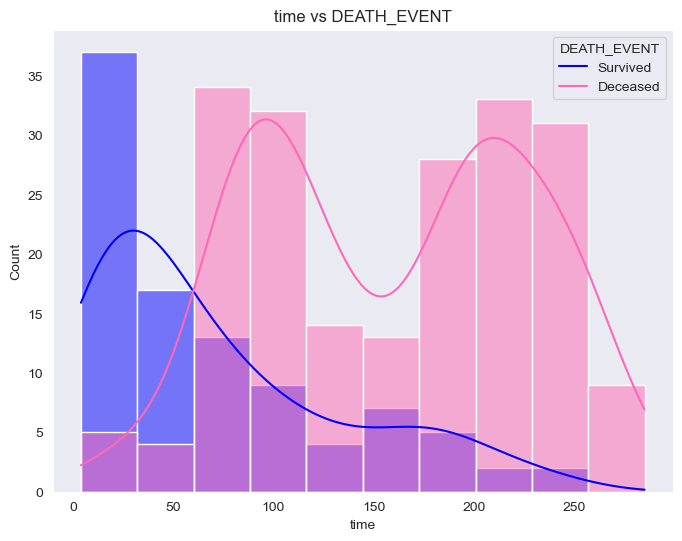

In [261]:

# Define the features (excluding DEATH_EVENT)
features = df.drop("DEATH_EVENT", axis=1).columns

# Define the colors
colors = ["hotpink", "blue"]

# Plotting for categorical variables
for feature in features:
    if df[feature].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(x=feature, hue="DEATH_EVENT", data=df)
        plt.title(f"{feature} vs DEATH_EVENT")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.legend(title='DEATH_EVENT', labels=['Survived', 'Deceased'])
        plt.show()

# Plotting for continuous variables
for feature in features:
    if df[feature].dtype != 'object':
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=feature, hue="DEATH_EVENT", kde=True, palette=colors)
        plt.title(f"{feature} vs DEATH_EVENT")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.legend(title='DEATH_EVENT', labels=['Survived', 'Deceased'])
        plt.show()

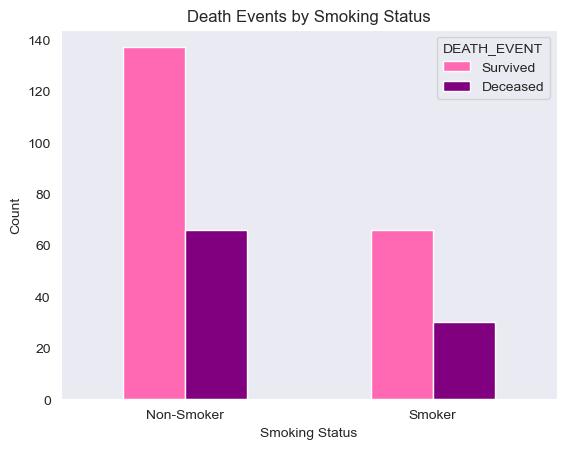

In [269]:
grouped_data = df.groupby(['smoking', 'DEATH_EVENT']).size().unstack()

# Plot grouped bar chart
grouped_data.plot(kind='bar', stacked=False, color=["hotpink", "purple"])

# Add labels and title
plt.title('Death Events by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'], rotation=0)

# Add legend
plt.legend(title='DEATH_EVENT', labels=['Survived', 'Deceased'])

# Show plot
plt.show()

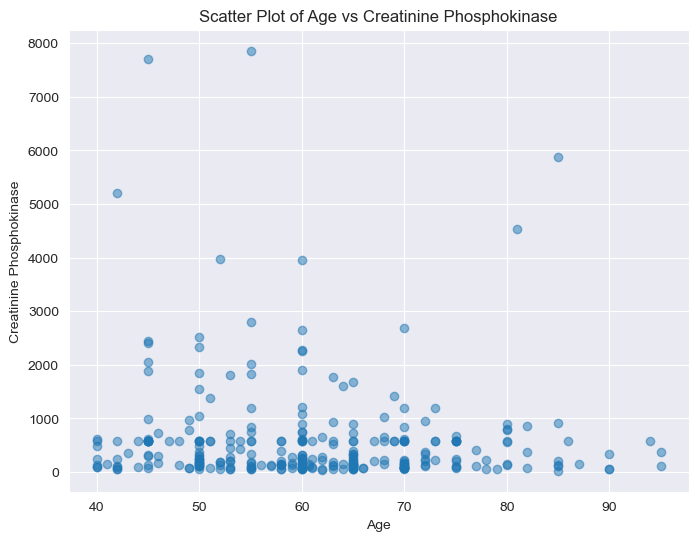

In [ ]:
# Extracting the variables
x = df['age']
y = df['creatinine_phosphokinase']

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' adjusts the transparency of the points
plt.title('Scatter Plot of Age vs Creatinine Phosphokinase')
plt.xlabel('Age')
plt.ylabel('Creatinine Phosphokinase')
plt.grid(True)  # Add gridlines for better readability
plt.show()

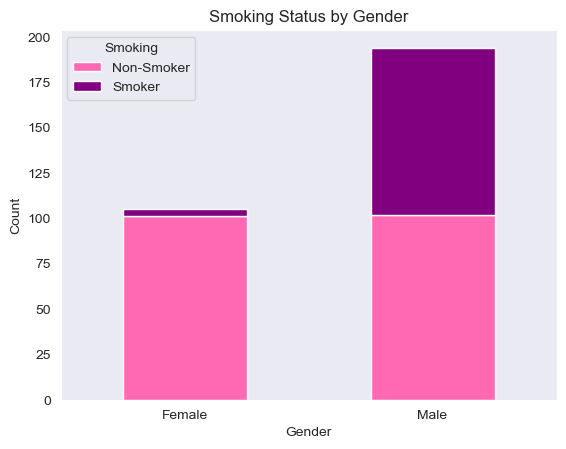

In [268]:
# Group data by 'sex' and 'smoking' columns and count occurrences
grouped_data = df.groupby(['sex', 'smoking']).size().unstack()

# Plot stacked bar chart
grouped_data.plot(kind='bar', stacked=True, color=["hotpink", "purple"])

# Add labels and title
plt.title('Smoking Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)

# Add legend
plt.legend(title='Smoking', labels=['Non-Smoker', 'Smoker'])

# Show plot
plt.show()


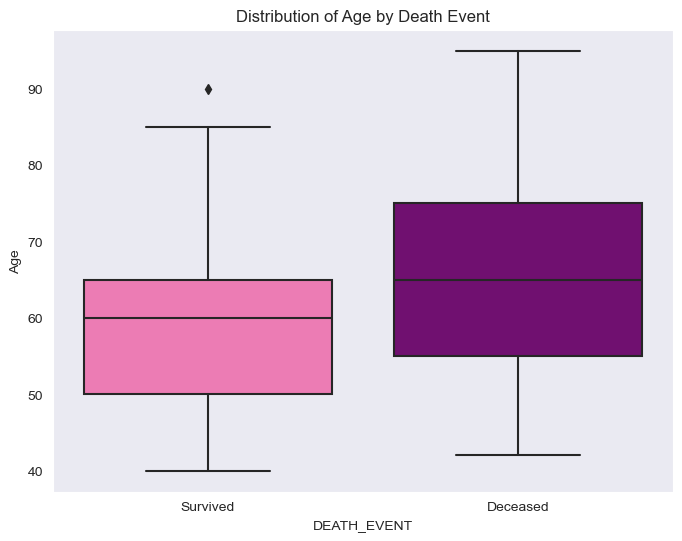

In [265]:


plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='age', data=df, palette=["hotpink", "purple"])
plt.title('Distribution of Age by Death Event')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Age')
plt.xticks([0, 1], ['Survived', 'Deceased'])
plt.show()

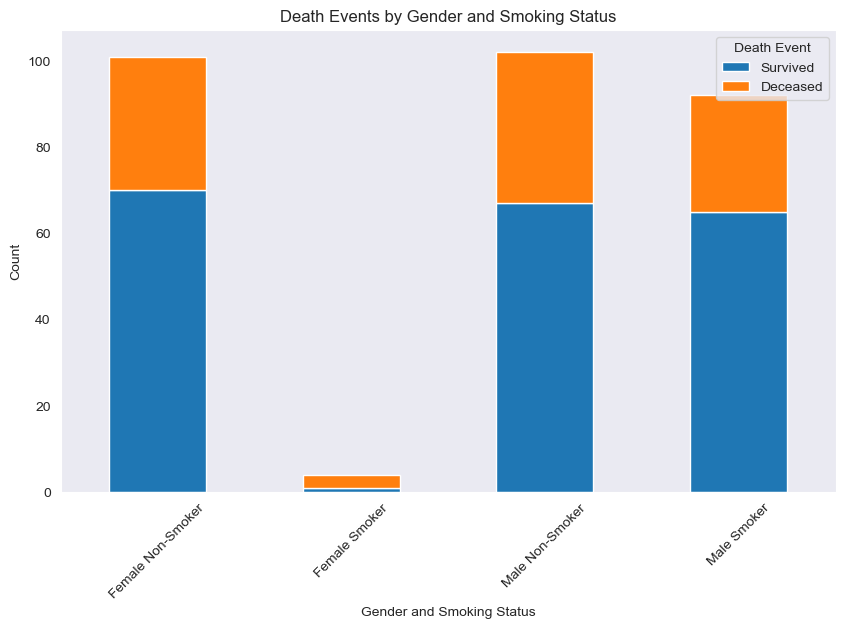

In [241]:
grouped_data = df.groupby(['sex', 'smoking', 'DEATH_EVENT']).size().unstack()

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', ax=ax, stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Death Events by Gender and Smoking Status')
plt.xlabel('Gender and Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Death Event', labels=['Survived', 'Deceased'])
gender_labels = ['Female Non-Smoker', 'Female Smoker', 'Male Non-Smoker', 'Male Smoker']
plt.xticks(range(len(gender_labels)), gender_labels, rotation=45)
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

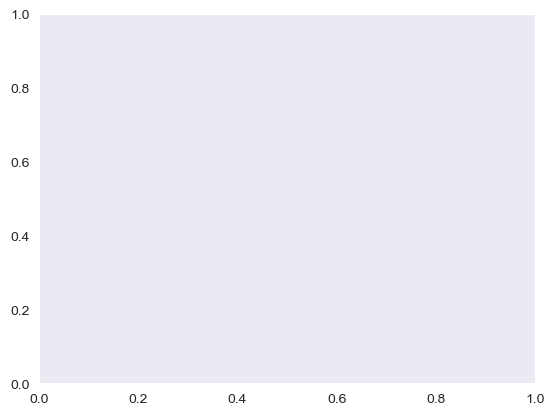

In [ ]:
from sklearn.cluster import KMeans


data = np.vstack(df.astype(np.int32))

# Plot
fig, ax = plt.subplots()
ax.scatter(data[:,0],data[:,1])
ax.set_title('Heart data')


"""
---------------------------
Execute K-Means clustering
---------------------------
"""

kmeans = KMeans(n_clusters=2, n_init=15)
kmeans.fit(data)
print("WCSS: ", kmeans.inertia_)
print("Iternations until converged: ", kmeans.n_iter_)
print("Final centroids: ")
print(kmeans.cluster_centers_)
print("Cluster assignments ")
print(kmeans.labels_)


"""
---------------------------
Visualize clustering (Task 2)
---------------------------
"""

fig, ax = plt.subplots()
idxs = np.unique(kmeans.labels_)

for i in idxs:
    #Points of cluster
    points = data[kmeans.labels_==i,:]
    #Plot points
    plt.scatter(points[:,0], points[:,1])
    #Plot centroids
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], s=100, c='red')

#Aesthetics    
ax.set_title('K-Means clustering')


In [208]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
"""

the nerual network 

"""
# Preprocessing
X = df.drop('DEATH_EVENT', axis=1).values
y = df['DEATH_EVENT'].values

#Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Dense(24, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])  ## change around 

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
NNetwork = model.fit(X_train, y_train, epochs=40, batch_size=40, validation_split=0.2) ## change this around to see if reduce overfitting 

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/40
5/5 [==============================] - 0s 24ms/step - loss: 41384.3945 - accuracy: 0.3089 - val_loss: 36090.9844 - val_accuracy: 0.2500
Epoch 2/40
5/5 [==============================] - 0s 9ms/step - loss: 30981.6914 - accuracy: 0.3089 - val_loss: 25418.1973 - val_accuracy: 0.2500
Epoch 3/40
5/5 [==============================] - 0s 10ms/step - loss: 20663.1250 - accuracy: 0.3089 - val_loss: 14687.3877 - val_accuracy: 0.2500
Epoch 4/40
5/5 [==============================] - 0s 5ms/step - loss: 10372.9932 - accuracy: 0.3089 - val_loss: 4006.4990 - val_accuracy: 0.2500
Epoch 5/40
5/5 [==============================] - 0s 5ms/step - loss: 1449.7125 - accuracy: 0.5550 - val_loss: 1545.6512 - val_accuracy: 0.7500
Epoch 6/40
5/5 [==============================] - 0s 5ms/step - loss: 2729.1411 - accuracy: 0.6911 - val_loss: 2695.3899 - val_accuracy: 0.7500
Epoch 7/40
5/5 [==============================] - 0s 6ms/step - loss: 3487.3328 - accuracy: 0.6911 - val_loss: 2595.2571 - val_

accuracy: 0.6178 - val_accuracy: 0.2500 (overfitting) = staggered ROC curve  epochs= 10 with dense 64 64 1
model performance is not learning

accuracy: 0.5812 -  val_accuracy: 0.7500  dense 64 64 1 epochs=40, batch_size=30, validation_split=0.2

a and vacc has to be simillar to prove not overfitting 

loss: 54.5176 - accuracy: 0.4764 - val_loss: 54.3613 - val_accuracy: 0.3542 epochs 40 dense = 24 24 1  GOOD

loss: 87.1697 - accuracy: 0.6178 - val_loss: 43.5744 - val_accuracy: 0.7500 epochs 40 dense = 21 21 1  GOOD


 epochs=40, batch_size=40, validation_split=0.2 dense = 24 24 1 BEST ONE SO FAR 


 accuracy: 0.6440 - val_loss: 21.1935 - val_accuracy: 0.6458  epochs=40, batch_size=40, validation_split=0.2 dense = 24 24 1 BEST ONE SO FAR 


In [159]:
## save the network
model.save('heart.h5')

In [162]:
## load the file
heart_model = tf.keras.models.load_model('heart.h5')

In [164]:
## make prediction
y_pred_ann = heart_model.predict(X_test)
y_pred_ann

2/2 [==============================] - 0s 2ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [165]:
## set a threshold
y_pred_ann = np.where(y_pred_ann > 0.5, 1,0)
y_pred_ann

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [166]:
print(y_test.shape)
print(y_pred_ann.shape)

(60,)
(60, 1)


In [234]:
## classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.42      1.00      0.59        25

    accuracy                           0.42        60
   macro avg       0.21      0.50      0.29        60
weighted avg       0.17      0.42      0.25        60



what does this mean? 

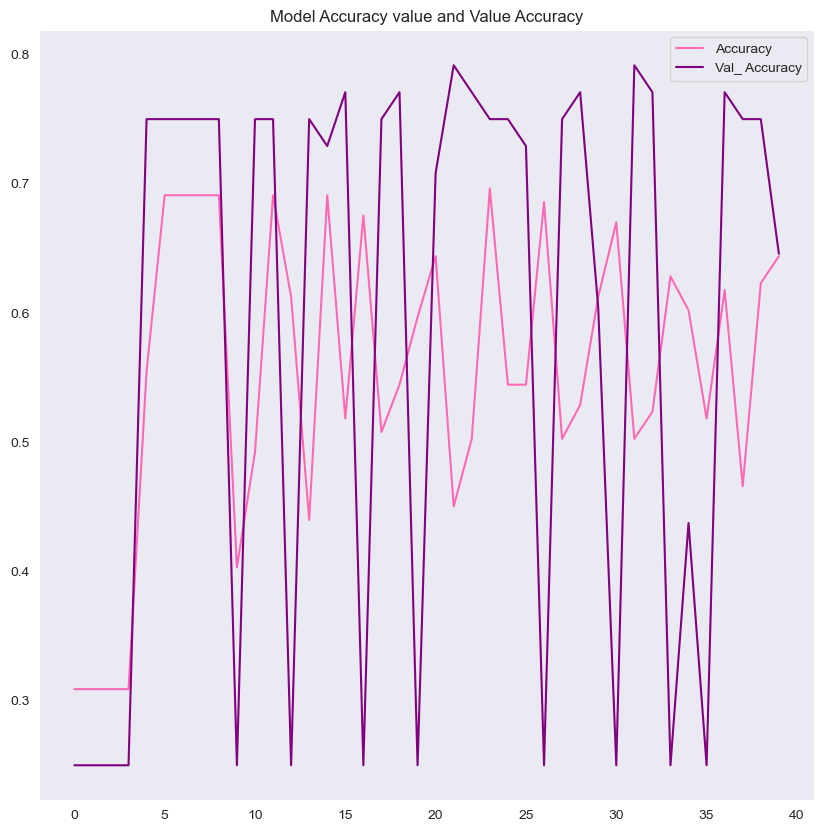

In [273]:
plt.figure(figsize=(10,10))
plt.plot(NNetwork.history['accuracy'], label = 'Accuracy',color='hotpink')
plt.plot(NNetwork.history['val_accuracy'], label = 'Val_ Accuracy',color='purple')
plt.title('Model Accuracy value and Value Accuracy')
plt.legend()
plt.show()

what does this mean?

accuracy - training set 
val acc - accuaryc on valdation set 



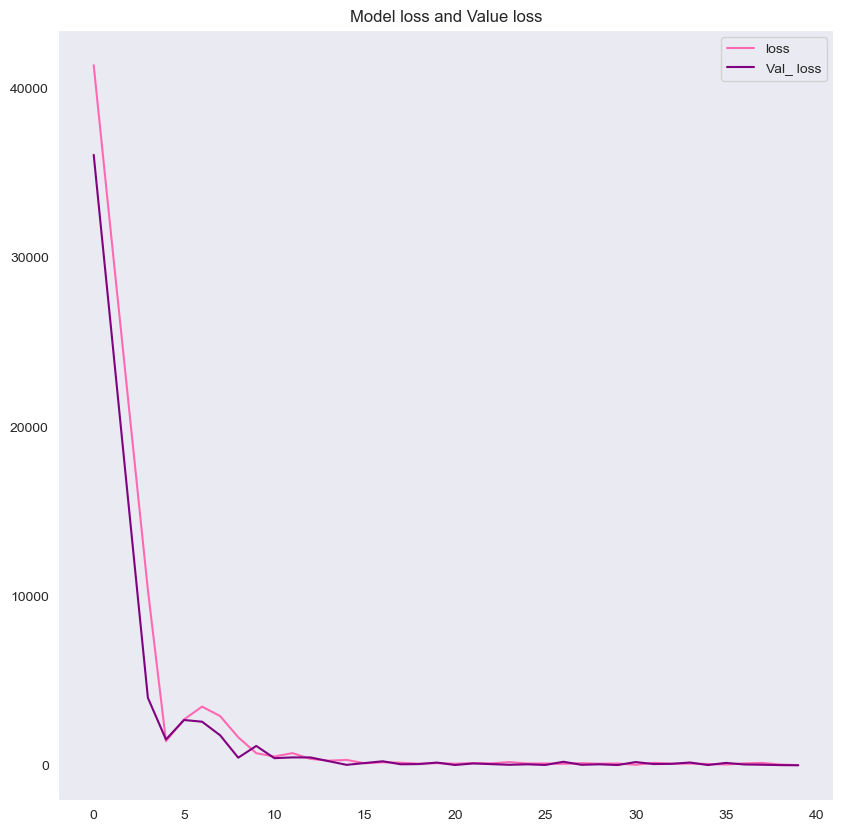

In [272]:

plt.figure(figsize=(10,10))
plt.plot(NNetwork.history['loss'], label = 'loss', color='hotpink')
plt.plot(NNetwork.history['val_loss'], label = 'Val_ loss', color='purple')
plt.title('Model loss and Value loss')
plt.legend()
plt.show()


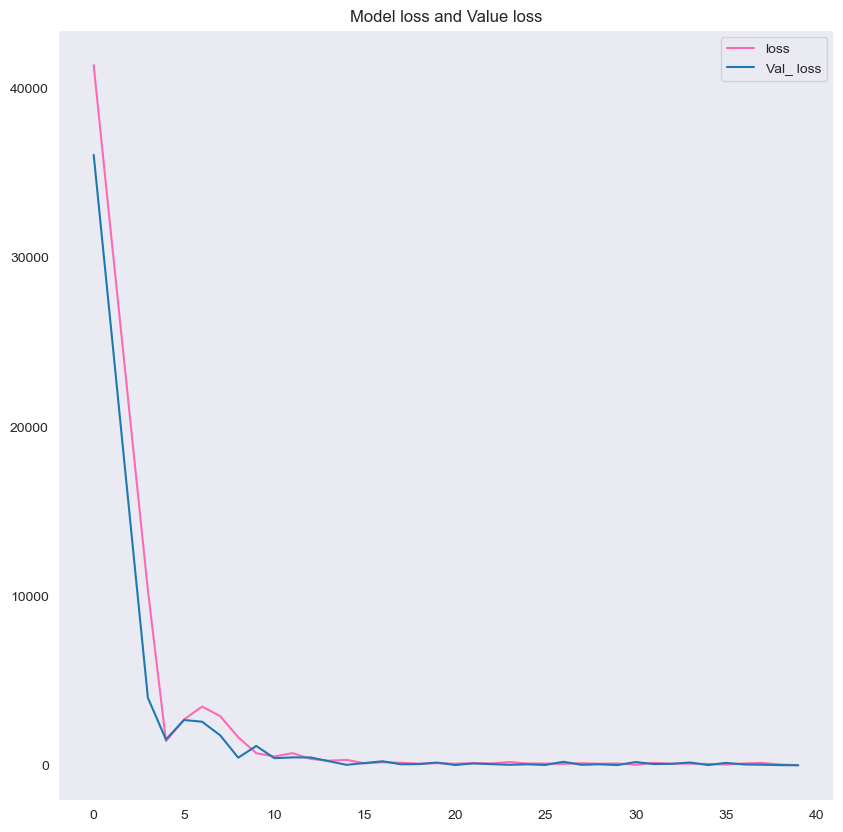

In [271]:
plt.figure(figsize=(10,10))
plt.plot(NNetwork.history['loss'], label = 'loss', color='hotpink')
plt.plot(NNetwork.history['val_loss'], label = 'Val_ loss')
plt.title('Model loss and Value loss')
plt.legend()
plt.show()

what does this mean?
